In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

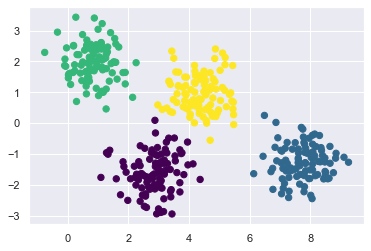

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]

from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

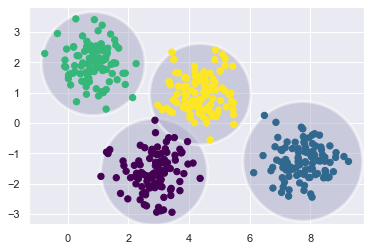

In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#ACACCA', lw=3, alpha=0.5, zorder=1))
        
        
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

Note: you may need to restart the kernel to use updated packages.


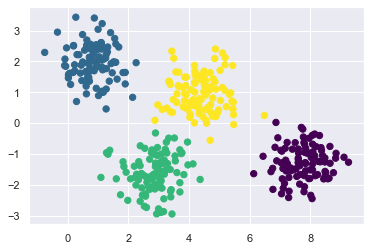

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [8]:
import pandas as pd
rice = pd.read_csv('Rice_dMeth_dExp.txt', sep="\t")

print(rice)

              gene_ID  dMethylation  dExpression
0      LOC_Os01g01010      0.872069     0.135616
1      LOC_Os01g01019      0.290323    -0.692117
2      LOC_Os01g01050      2.521890     0.094727
3      LOC_Os01g01070     -4.336898    -0.377675
4      LOC_Os01g01080      2.756643    -1.216835
...               ...           ...          ...
53530  LOC_Os09g40010     -1.604396     0.000000
53531  LOC_Os09g40014     10.382362     0.000000
53532  LOC_Os09g40018     -0.361111     0.000000
53533  LOC_Os09g40050      0.083756    -0.007299
53534  LOC_Os09g40060     -1.918919     0.000000

[53535 rows x 3 columns]


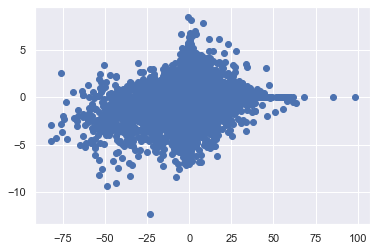

In [9]:
plt.scatter(rice.dMethylation, rice.dExpression);

In [10]:
rice1 = rice[['dMethylation','dExpression']]
rice1

,dMethylation,dExpression
0,0.872069,0.135616
1,0.290323,-0.692117
2,2.521890,0.094727
3,-4.336898,-0.377675
4,2.756643,-1.216835
...,...,...
53530,-1.604396,0.000000
53531,10.382362,0.000000
53532,-0.361111,0.000000
53533,0.083756,-0.007299


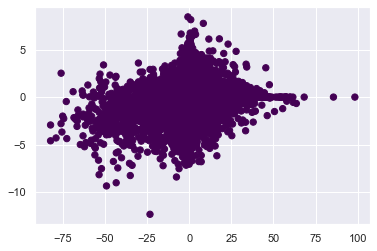

In [11]:
rice_gmm = GaussianMixture(n_components=1).fit(rice1)
labels = rice_gmm.predict(rice1)
plt.scatter(rice1.dMethylation, rice1.dExpression, c=labels, s=40, cmap='viridis');

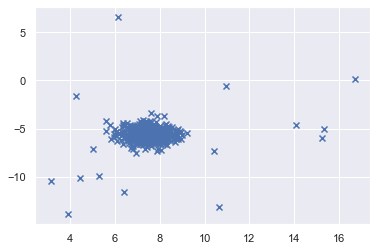

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=1, cluster_std=0.60, random_state=5)
X_append, y_true_append = make_blobs(n_samples=20,centers=1, cluster_std=5,random_state=5)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] 
plt.scatter(X[:,0],X[:,1],marker="x");

SyntaxError: invalid syntax (<ipython-input-148-973386ebfd39>, line 1)

In [20]:
def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    var = np.var(X,axis=0)
    print(mu, var)
    return mu,var


In [24]:
m = X.shape[0]
    #compute mean of X
sum_ = np.sum(X,axis=0)
mu = (sum_/m)
    # compute variance of X
var = np.var(X,axis=0)

In [40]:
def multivariateGaussian(X, mu, sigma):
    k = len(mu)
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p

In [41]:
p = multivariateGaussian

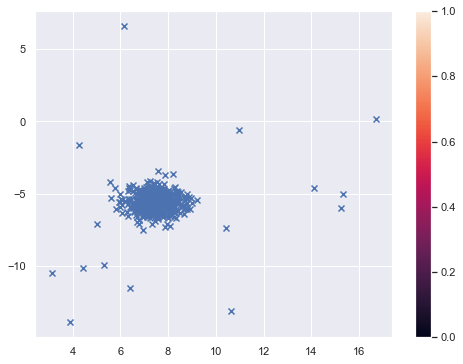

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",cmap='viridis');
plt.colorbar();

TypeError: '<' not supported between instances of 'function' and 'float'

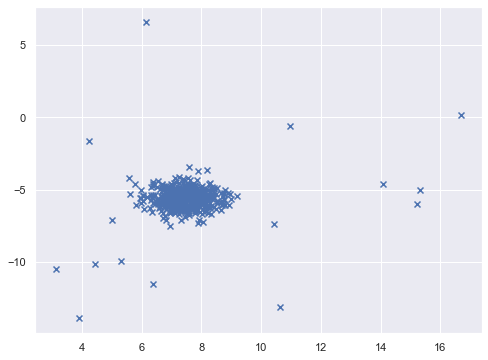

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",cmap='viridis');
# Circling of anomalies
outliers = np.nonzero(p<0.00001)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

<module 'numpy' from '/opt/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>